In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Read the data

In [10]:
raw_data = pd.read_csv("FuelConsumptionCo2.csv")
raw_data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


### Explore the data

In [4]:
raw_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


* Here there are no null values, hence data cleaning is not required

### Correlation

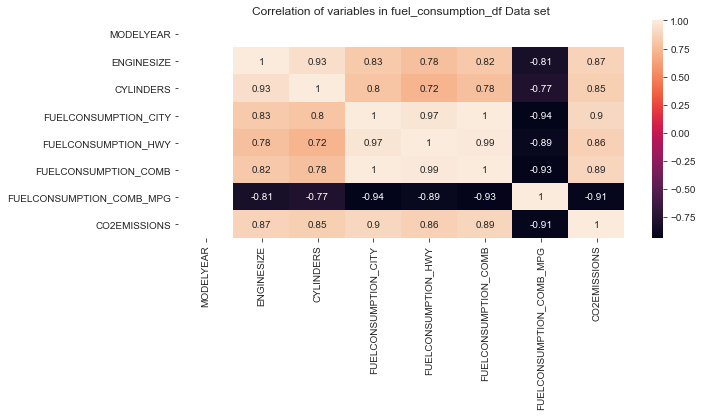

In [5]:
import seaborn as sns
corr_data = raw_data.corr()
plt.figure(figsize=(10,4))
sns.set_style('ticks')
sns.heatmap(corr_data, annot=True)
plt.title('Correlation of variables in fuel_consumption_df Data set')
plt.show()

* Here the dependent variable is corbon dioxide emissions, and this is high positive correlation to fuel consumption city column, around 0.9.

* And this is high negative correlation to fuel consumption combination miles per gallon column, around 0.9

In [22]:
raw_data_visualization = raw_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY',
                                   'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',
                                   'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]
raw_data_visualization

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


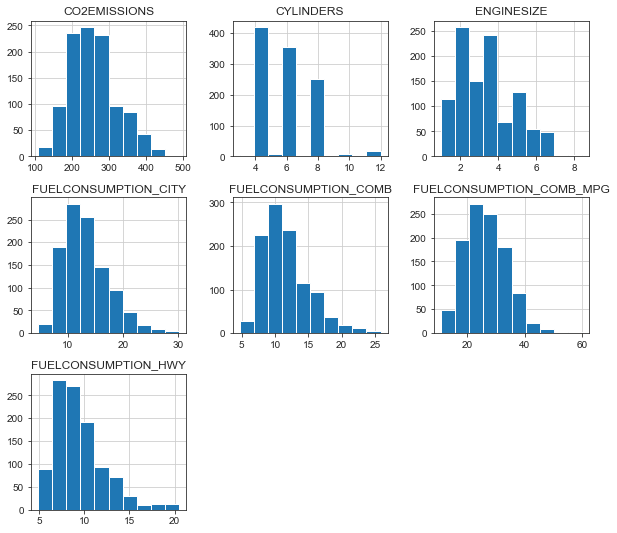

In [24]:
raw_data_visualization.hist(figsize=(10,9))
plt.show()

### Scatter plots

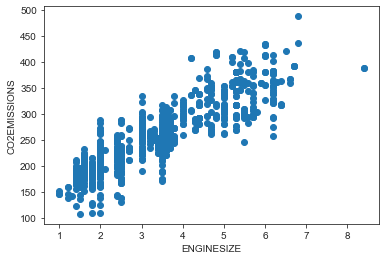

In [26]:
plt.scatter(x = raw_data["ENGINESIZE"], y = raw_data["CO2EMISSIONS"])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

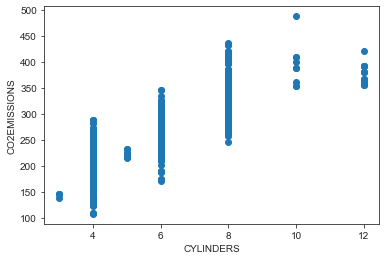

In [27]:
plt.scatter(x = raw_data["CYLINDERS"], y = raw_data["CO2EMISSIONS"])
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSIONS')
plt.show()

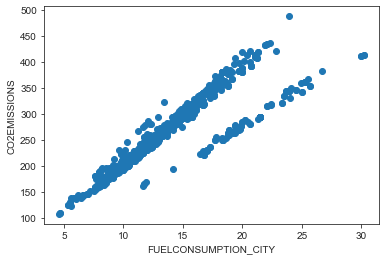

In [28]:
plt.scatter(x = raw_data["FUELCONSUMPTION_CITY"], y = raw_data["CO2EMISSIONS"])
plt.xlabel('FUELCONSUMPTION_CITY')
plt.ylabel('CO2EMISSIONS')
plt.show()

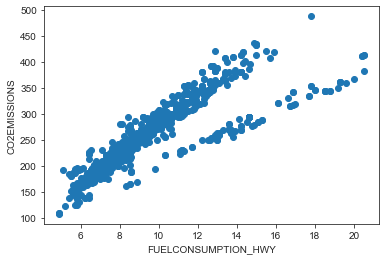

In [29]:
plt.scatter(x = raw_data["FUELCONSUMPTION_HWY"], y = raw_data["CO2EMISSIONS"])
plt.xlabel('FUELCONSUMPTION_HWY')
plt.ylabel('CO2EMISSIONS')
plt.show()

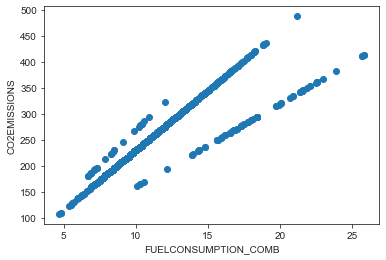

In [30]:
plt.scatter(x = raw_data["FUELCONSUMPTION_COMB"], y = raw_data["CO2EMISSIONS"])
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

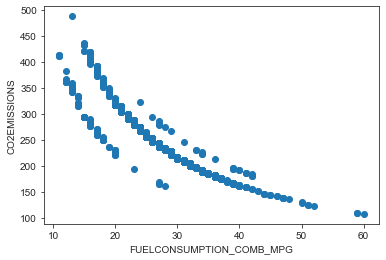

In [31]:
plt.scatter(x = raw_data["FUELCONSUMPTION_COMB_MPG"], y = raw_data["CO2EMISSIONS"])
plt.xlabel('FUELCONSUMPTION_COMB_MPG')
plt.ylabel('CO2EMISSIONS')
plt.show()

### Split the data

In [52]:
np.random.seed(42)
split_random = np.random.rand(len(raw_data_visualization)) < 0.8
train_data = raw_data_visualization[split_random]
print("Training data consists of:", len(train_data), "number of rows")
print()
test_data = raw_data_visualization[~split_random]
print("Testing data consists of:", len(test_data), "number of rows")


Training data consists of: 848 number of rows

Testing data consists of: 219 number of rows


### import necessary libraries for linear regression

In [72]:
from sklearn import linear_model
from sklearn.metrics import r2_score

### Fit the linear model

In [55]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_data[['ENGINESIZE']])
train_y = np.asanyarray(train_data[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.526118]]
Intercept:  [124.17604844]


### Evaluate and plot the model

Train data, Mean absolute error: 23.56
Train data, Residual sum of squares (MSE): 971.38
Train data, Rsquare-score: 0.69



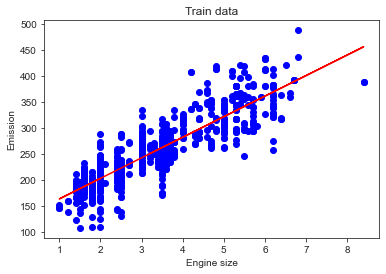

Test data, Mean absolute error: 22.58
Test data, Residual sum of squares (MSE): 851.05
Test data, Rsquare-score: 0.74


Text(0.5, 1.0, 'Test data')

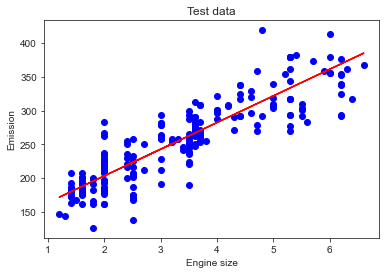

In [79]:
train_y_ = regr.predict(train_x)

print("Train data, Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
print("Train data, Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
print("Train data, Rsquare-score: %.2f" % r2_score(train_y_ , train_y) )
print()

plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Train data")
plt.show()

test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Test data, Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Test data, Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Test data, Rsquare-score: %.2f" % r2_score(test_y_ , test_y) )

plt.scatter(test_data.ENGINESIZE, test_data.CO2EMISSIONS,  color='blue')
plt.plot(test_x,test_y_ , '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Test data")

In [109]:
def calculate_linear_regression(a, b, col_name_a,col_name_b):
    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(a)
    train_y = np.asanyarray(b)
    regr.fit (train_x, train_y)
    # The coefficients
    print ('Coefficients: ', regr.coef_)
    print ('Intercept: ',regr.intercept_)
    print()
    print('y = '+'{}'.format(np.round(regr.coef_[0][0],2)),'x'+" + {}".format(np.round(regr.intercept_[0],2)))
    print()
    train_y_ = regr.predict(train_x)

    print("Train data, Mean absolute error: %.2f" % np.mean(np.absolute(train_y_ - train_y)))
    print("Train data, Residual sum of squares (MSE): %.2f" % np.mean((train_y_ - train_y) ** 2))
    print("Train data, Rsquare-score: %.2f" % r2_score(train_y_ , train_y) )
    print()

    plt.scatter(train_data[[col_name_a]], train_data[[col_name_b]],  color='blue')
    plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
    plt.xlabel(col_name_a)
    plt.ylabel(col_name_b)
    plt.title("Train data")
    plt.show()

    test_x = np.asanyarray(test_data[[col_name_a]])
    test_y = np.asanyarray(test_data[[col_name_b]])
    test_y_ = regr.predict(test_x)

    print("Test data, Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
    print("Test data, Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
    print("Test data, Rsquare-score: %.2f" % r2_score(test_y_ , test_y) )

    plt.scatter(test_data[[col_name_a]], test_data[[col_name_b]],  color='blue')
    plt.plot(test_x,test_y_ , '-r')
    plt.xlabel(col_name_a)
    plt.ylabel(col_name_b)
    plt.title("Test data")

Coefficients:  [[13.89675057]]
Intercept:  [71.56043508]

y = 13.9 x + 71.56

Train data, Mean absolute error: 19.38
Train data, Residual sum of squares (MSE): 788.10
Train data, Rsquare-score: 0.76



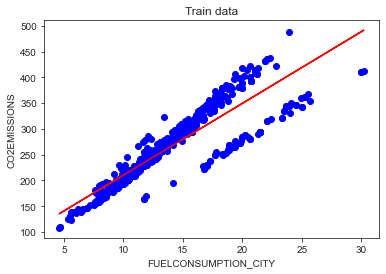

Test data, Mean absolute error: 19.47
Test data, Residual sum of squares (MSE): 731.59
Test data, Rsquare-score: 0.77


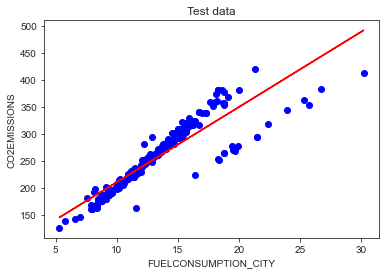

In [122]:
calculate_linear_regression(train_data[["FUELCONSUMPTION_CITY"]],train_data[["CO2EMISSIONS"]] ,"FUELCONSUMPTION_CITY", 'CO2EMISSIONS')